<a href="https://colab.research.google.com/github/maneesh51/NLP_Udemy_Course/blob/main/Prj2_RestaurantReviewPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Restaurant Review Predictions

# 1. Cleaning the review data

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from tqdm.notebook import trange

In [7]:
### quoting is to ignore the double quotes "".

data = pd.read_csv('Restaurant_Reviews.tsv', sep='\t', quoting=3)
data.head

<bound method NDFrame.head of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [8]:
data.Liked.value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [19]:
### removing unwanted chars

data.Review[0]

'Wow... Loved this place.'

In [28]:
#### searching the pattern which we want to replace
#### including only alphabatical chars and others will be removed

review0 = re.sub('[^a-zA-Z]', ' ', data.Review[0])

### and convert all char to lowercase
review0 = review0.lower()

review0

'wow    loved this place '

In [29]:
#### downloading stop words from nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
### first tokenize the texts
review0 = review0.split()
review0

['wow', 'loved', 'this', 'place']

In [31]:
process_review = []

for word in review0:
  if word not in stopwords.words('english'):
    process_review.append(word)
process_review

['wow', 'loved', 'place']

In [33]:
### writing the cell above in single liner 
review0 = [word for word in review0 if word not in stopwords.words('english')]
review0

['wow', 'loved', 'place']

#### Stemming

In [34]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

In [35]:
review0 = [ps.stem(word) for word in review0]
review0

['wow', 'love', 'place']

In [36]:
### finally, join back this processed review text

review0 = " ".join(review0)
review0

'wow love place'

In [41]:
### applying this preprocessing steps on all of dataset

ps = PorterStemmer()

reviews=[]
for i in trange(len(data)):
  reviewi = re.sub('[^a-zA-Z]', ' ', data.Review[i])
  reviewi = reviewi.lower()
  reviewi = reviewi.split()
  reviewi = [ps.stem(word) for word in reviewi if word not in stopwords.words('english')]
  reviewi = " ".join(reviewi)

  reviews.append(reviewi)

reviews[:10]

  0%|          | 0/1000 [00:00<?, ?it/s]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

# 2. Bag of word model

https://en.wikipedia.org/wiki/Bag-of-words_model

exmple:

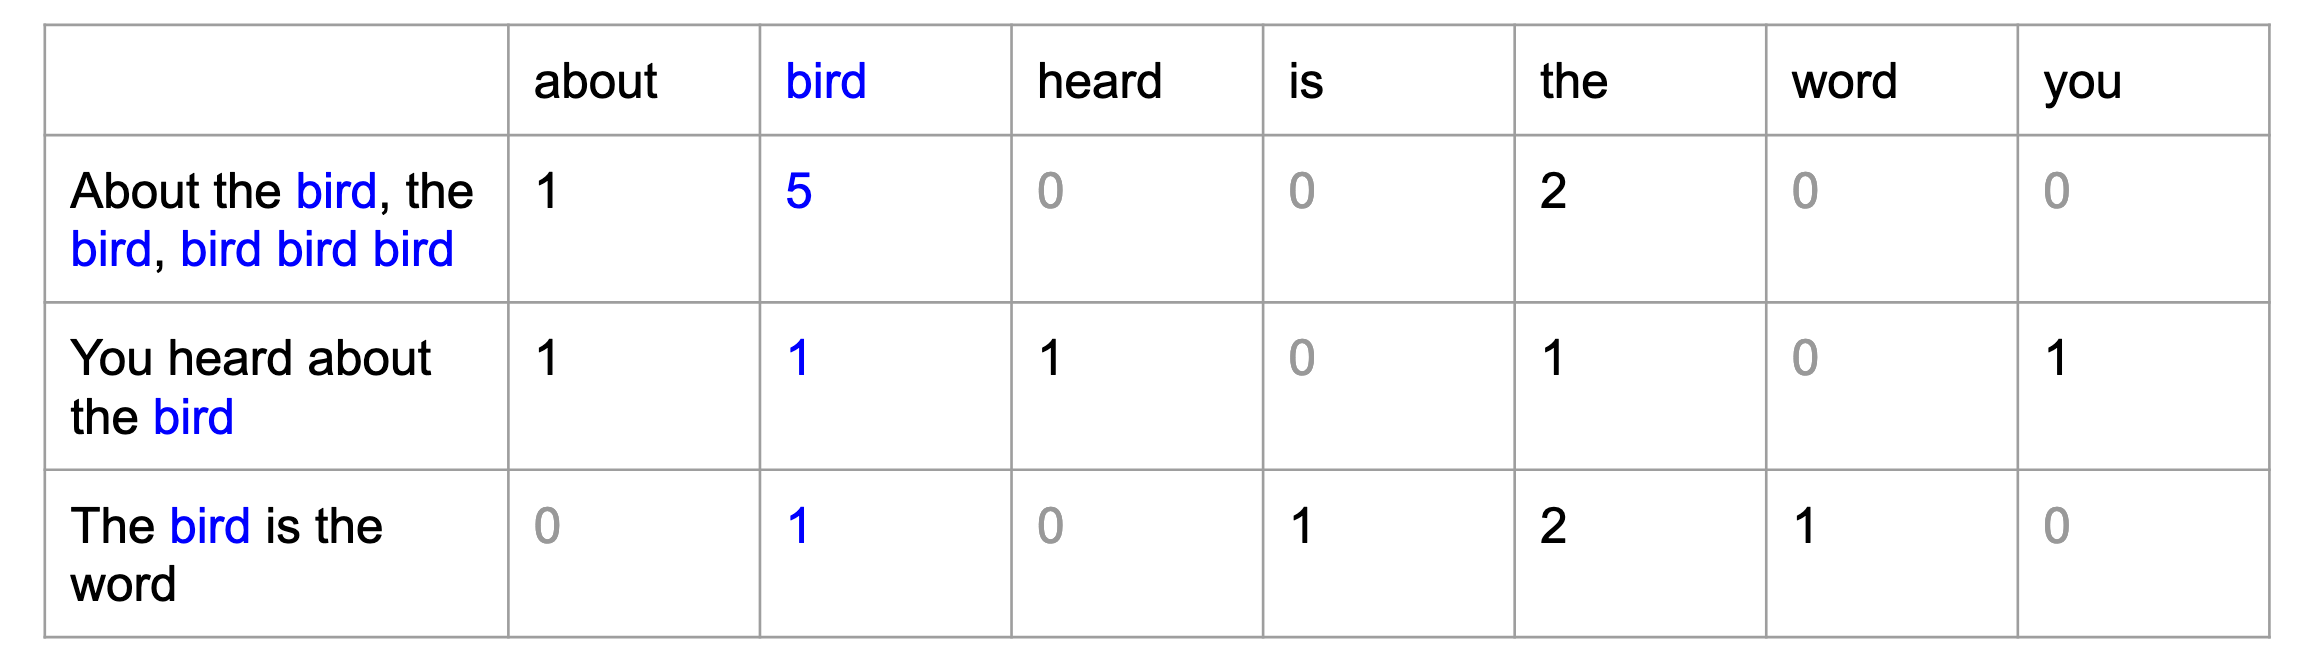

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
#### giving a total no. of words limit (1500) in the 'bag of word' vocabulary

cv = CountVectorizer(max_features=1500)
x = cv.fit_transform(reviews).toarray()

y = data.iloc[:,1].values

print(x.shape, y.shape, '\n', y[:10])

(1000, 1500) (1000,) 
 [1 0 0 1 1 0 0 0 1 1]


# 3. Naive Bayes Algorithm 